In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

from import_raw import *
from import_raw_advanced import *

## Supercharger 112kW

In [10]:
base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen2/Laden112kW/"

# directly on the cable
measurement = "2021-11-16_11-28-23_112kW_direkt_auf_Kabel"

auf_Kabel_TD = import_time(base + measurement + "_TD.csv")
auf_Kabel_SP = import_spec(base + measurement + "_SPEC.csv")

# 1cm from the cable
measurement = "2021-11-26_11-29-01_112kW_1cm_von_Kabel"

dist_1cm_TD = import_time(base + measurement + "_TD.csv")
dist_1cm_SP = import_spec(base + measurement + "_SPEC.csv")

measurement = "2021-11-26_11-31-19_112kW_1cm_von_Kabel"

dist_1cm_TD2 = import_time(base + measurement + "_TD.csv")
dist_1cm_SP2 = import_spec(base + measurement + "_SPEC.csv")

# 2cm from the cable
measurement = "2021-11-26_11-29-51_112kW_2cm_von_Kabel"

dist_2cm_TD = import_time(base + measurement + "_TD.csv")
dist_2cm_SP = import_spec(base + measurement + "_SPEC.csv")

measurement = "2021-11-26_11-31-45_112kW_2cm_von_Kabel"

dist_2cm_TD2 = import_time(base + measurement + "_TD.csv")
dist_2cm_SP2 = import_spec(base + measurement + "_SPEC.csv")

# 10cm from the cable
measurement = "2021-11-26_11-32-04_112kW_10cm_von_Kabel"

dist_10cm_TD = import_time(base + measurement + "_TD.csv")
dist_10cm_SP = import_spec(base + measurement + "_SPEC.csv")

measurement = "2021-11-26_11-32-36_112kW_10cm_von_Kabel"

dist_10cm_TD2 = import_time(base + measurement + "_TD.csv")
dist_10cm_SP2 = import_spec(base + measurement + "_SPEC.csv")

# 20cm from the cable
measurement = "2021-11-26_11-32-54_112kW_20cm_von_Kabel"

dist_20cm_TD = import_time(base + measurement + "_TD.csv")
dist_20cm_SP = import_spec(base + measurement + "_SPEC.csv")

measurement = "2021-11-26_11-33-19_112kW_20cm_von_Kabel2"

dist_20cm_TD2 = import_time(base + measurement + "_TD.csv")
dist_20cm_SP2 = import_spec(base + measurement + "_SPEC.csv")

# 50cm from the cable
measurement = "2021-11-26_11-33-30_112kW_50cm_von_Kabel"

dist_50cm_TD = import_time(base + measurement + "_TD.csv")
dist_50cm_SP = import_spec(base + measurement + "_SPEC.csv")

measurement = "2021-11-26_11-34-02_112kW_50cm_von_Kabel2"

dist_50cm_TD2 = import_time(base + measurement + "_TD.csv")
dist_50cm_SP2 = import_spec(base + measurement + "_SPEC.csv")

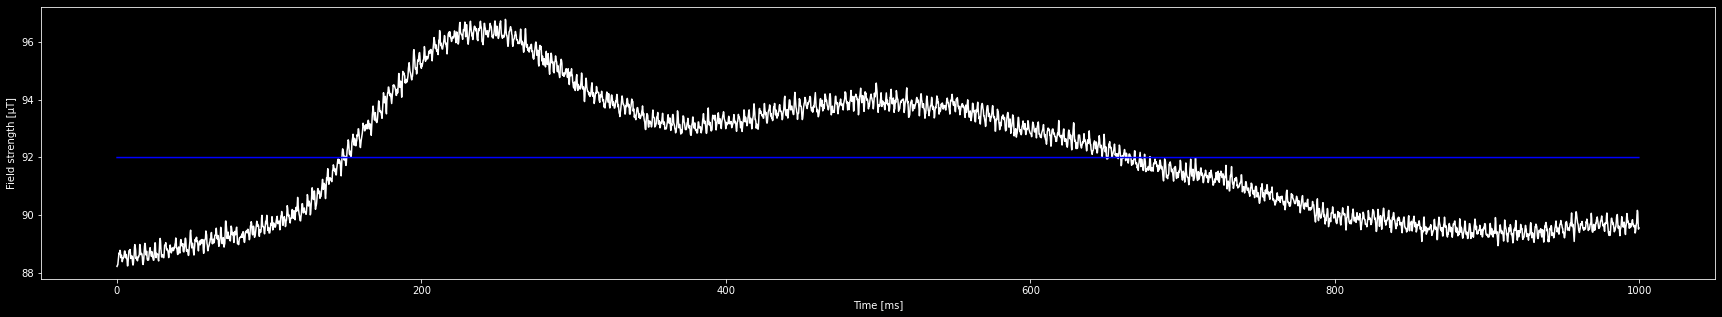

In [20]:
TOI = np.s_[:]

#dc_part = auf_Kabel_SP[0,4]
time = dist_10cm_TD2
freq = dist_10cm_SP2

dc_part = freq[0,4]
plt.figure(figsize=(30,5))
plt.title("")
plt.xlabel("Time [ms]")
plt.ylabel("Field strength [μT]")
plt.plot(time[TOI,0]*1e3, time[TOI,4], color="white")
plt.plot(time[TOI,0]*1e3, np.asarray([dc_part for i in np.arange(time[TOI,4].shape[0])]), color="blue")

In [12]:
distances = np.array([0, 1, 2, 10, 20, 50])
spec_domains1 = np.array([auf_Kabel_SP, dist_1cm_SP, dist_2cm_SP, dist_10cm_SP, dist_20cm_SP, dist_50cm_SP])
spec_domains2 = np.array([auf_Kabel_SP, dist_1cm_SP2, dist_2cm_SP2, dist_10cm_SP2, dist_20cm_SP2, dist_50cm_SP2])

dc_parts1 = np.array([i[0,4] for i in spec_domains1])
dc_parts2 = np.array([i[0,4] for i in spec_domains2])

dc_mean = np.mean(np.array([dc_parts1, dc_parts2]), axis=0)

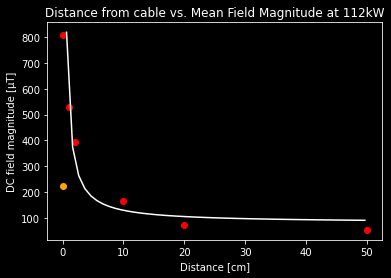

In [19]:
def func(x, m, n):
    return m / x + n

my_distances = distances
my_dc_mean = dc_mean
maximum = int(max(max(dc_parts1), max(dc_parts2)))

my_dc_mean = np.insert(my_dc_mean[1:], 0, maximum)

# fit reciprocal
x = np.arange(0.658,50)
y, blub = curve_fit(func, my_distances[1:], my_dc_mean[1:])

# add DC part of 22kW charging
dc22 = 221.9972

plt.figure()
plt.title("Distance from cable vs. Mean Field Magnitude at 112kW")
plt.xlabel("Distance [cm]")
plt.ylabel("DC field magnitude [μT]")
plt.scatter(my_distances, my_dc_mean, color='red')
plt.plot(x, y[0] / x + y[1], color='white')
plt.scatter(0, dc22, color='orange')
#plt.savefig('cablevsdistance.png')
plt.show()

spectrum is not very interesting

## Commercial Charger 22kW

In [14]:
base = "/Users/lionelpeer/polybox/ETH/HS21/EMFelderimAlltag/Messungen/Messungen1/Laden22kW/"

measurement = base + "2021-11-05_18_42_21_22kW_direkt_auf_Kabel"
time, freq = data_import(measurement)

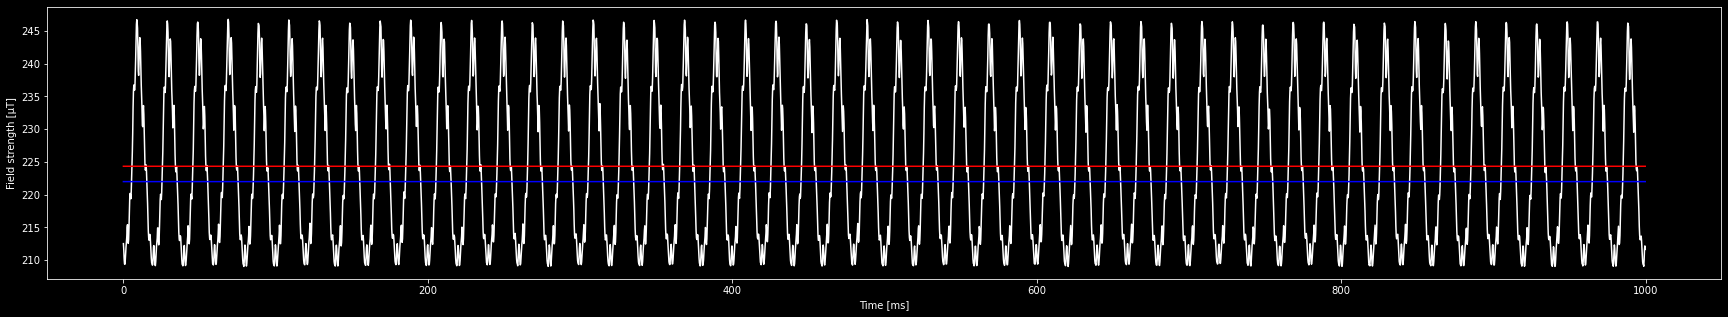

In [17]:
TOI = np.s_[:]

#dc_part = auf_Kabel_SP[0,4]
time = time
freq = freq

mean = np.mean(time[:,4])
dc_part = freq[0,4]
plt.figure(figsize=(30,5))
plt.title("")
plt.xlabel("Time [ms]")
plt.ylabel("Field strength [μT]")
plt.plot(time[TOI,0]*1e3, time[TOI,4], color="white")
plt.plot(time[TOI,0]*1e3, np.asarray([dc_part for i in np.arange(time[TOI,4].shape[0])]), color="blue")
plt.plot(time[TOI,0]*1e3, np.asarray([mean for i in np.arange(time[TOI,4].shape[0])]), color="red")

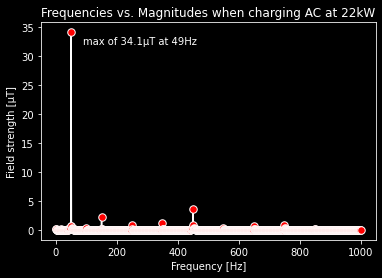

In [18]:
WOI = np.s_[1:] # frequency window of interest: DC fields carry too much signal
max_index = np.argmax(freq[WOI, 4])
maximum = np.max(freq[WOI, 4])

plt.figure()
plt.title("Frequencies vs. Magnitudes when charging AC at 22kW")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Field strength [μT]")
marginx = 40
plt.annotate("max of " + str(round(maximum, 2)) + "μT at " + str(max_index) + "Hz", (max_index + marginx, maximum-2))
plt.plot(freq[WOI,0], freq[WOI,4], color='white', marker='.', markerfacecolor='red', markersize=15)
#plt.savefig("spectrum_ACcharging.png")
plt.show()

DC part has been omitted, shown in the other Fig.